In [47]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.decomposition import  PCA
from sklearn import preprocessing
from sklearn import tree
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [3]:
features = pd.read_csv("UCI HAR Dataset/features.txt", header=None, sep=' ')
features.columns = ['index', 'features']
features = features.drop('index', axis=1)
features = features.values.reshape(1, -1)
features = list(features[0])
# features

In [38]:
X_train = loadtxt("UCI HAR Dataset/train/X_train.txt")
y_train = loadtxt("UCI HAR Dataset/train/y_train.txt").astype(int)

X_test = loadtxt("UCI HAR Dataset/test/X_test.txt")
y_test = loadtxt("UCI HAR Dataset/test/y_test.txt").astype(int)

In [39]:
train_subject = loadtxt("UCI HAR Dataset/train/subject_train.txt")
test_subject = loadtxt("UCI HAR Dataset/test/subject_test.txt")
train_data = pd.DataFrame(X_train)
test_data = pd.DataFrame(X_test)

train_data.columns = features
test_data.columns = features

train_data['subject'] = train_subject
train_data['subject'] = train_data['subject'].astype(int)
train_data['activity'] = y_train
train_data['activity'] = train_data['activity'].astype(int)

mapping = {1: 'WALKING', 2: 'WALKING_UP', 3: 'WALKING_DOWN', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

train_data['activity_label'] = train_data['activity'].map(mapping)
train_data = train_data.drop('activity', axis=1)
train_data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity_label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UP
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UP
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UP
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UP


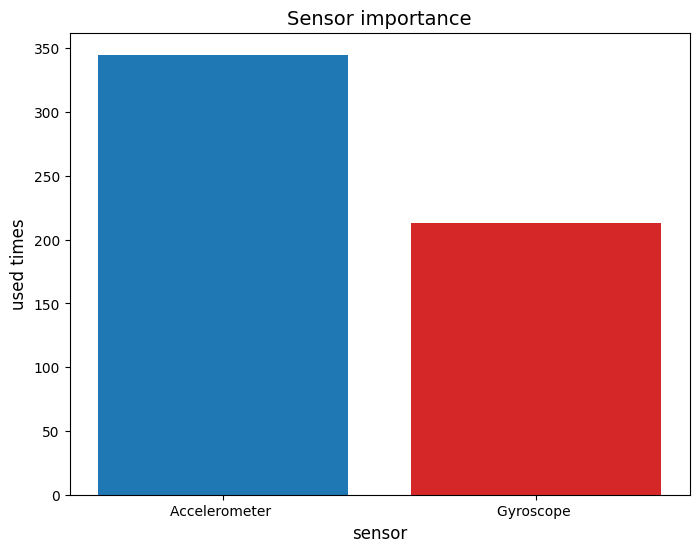

In [6]:
Acc   = 0
Gyro  = 0
other = 0 

for i in train_data.columns:
    if 'Acc' in i:
        Acc += 1
    elif 'Gyro' in i:
        Gyro += 1
    else:
        other += 1
        
plt.figure(figsize=(8, 6))
plt.bar(x = ['Accelerometer ','Gyroscope '], height = [Acc,Gyro], color=['tab:blue', 'tab:red'])
plt.title("Sensor importance", fontsize = 14)
plt.xlabel("sensor", size=12)
plt.ylabel("used times", size=12)
plt.xticks(fontsize=10)
plt.show()

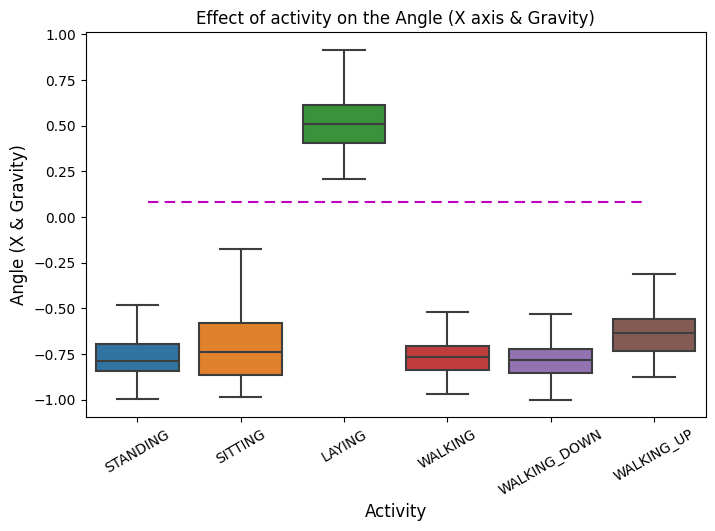

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='activity_label', y='angle(X,gravityMean)', data=train_data, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Effect of activity on the Angle (X axis & Gravity)', fontsize=12)
plt.xlabel("Activity", size=12)
plt.ylabel('Angle (X & Gravity)', size=12)
plt.xticks(rotation=30, fontsize=10)
plt.show()

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [41]:
train_data = pd.DataFrame(X_train)
test_data = pd.DataFrame(X_test)

train_data.columns = features
test_data.columns = features

train_data['subject'] = train_subject
train_data['subject'] = train_data['subject'].astype(int)
train_data['activity'] = y_train
train_data['activity'] = train_data['activity'].astype(int)

test_data['subject'] = test_subject
test_data['subject'] = test_data['subject'].astype(int)
test_data['activity'] = y_test
test_data['activity'] = test_data['activity'].astype(int)

mapping = {1: 'WALKING', 2: 'WALKING_UP', 3: 'WALKING_DOWN', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

train_data['activity_label'] = train_data['activity'].map(mapping)
train_data = train_data.drop('activity', axis=1)

test_data['activity_label'] = test_data['activity'].map(mapping)
test_data = test_data.drop('activity', axis=1)

In [42]:
train_data.shape, test_data.shape

((7352, 563), (2947, 563))

In [59]:
from sklearn.manifold import TSNE

X_for_tsne = train_data.drop(['subject', 'activity_label'], axis=1)

In [60]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

CPU times: total: 0 ns
Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.008s...
[t-SNE] Computed neighbors for 7352 samples in 1.148s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.092079
[t-SNE] KL divergence after 1000 iterations: 1.294997


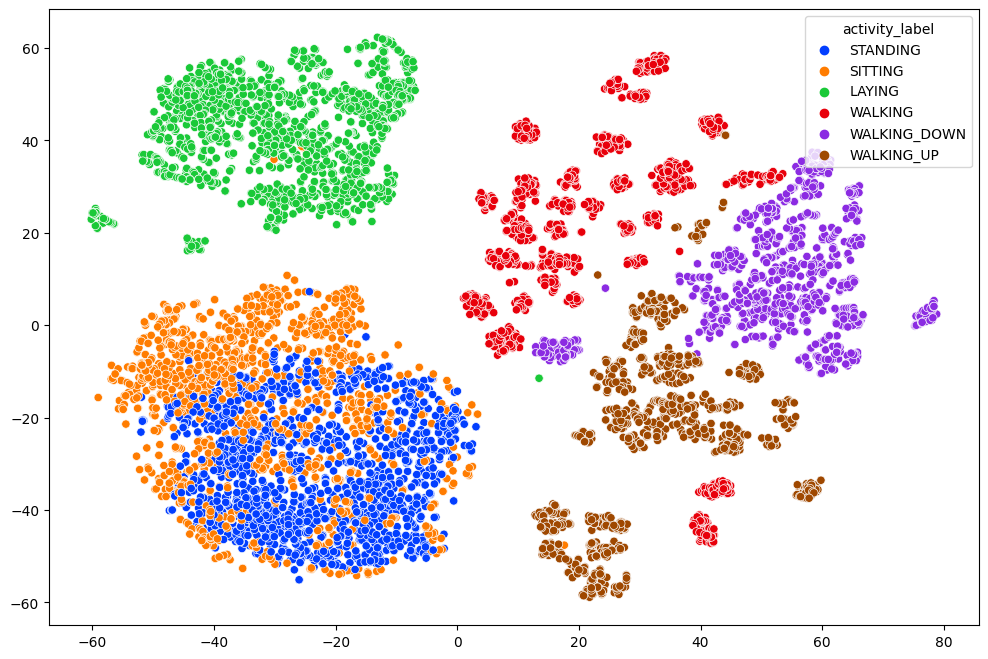

In [61]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train_data["activity_label"], palette="bright")
plt.show()

In [62]:
y_train = train_data.activity_label
X_train = train_data.drop(['subject', 'activity_label'], axis=1)
y_test = test_data.activity_label
X_test = test_data.drop(['subject', 'activity_label'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [64]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [65]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9579233118425518


In [66]:
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize=(12,8)) 
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

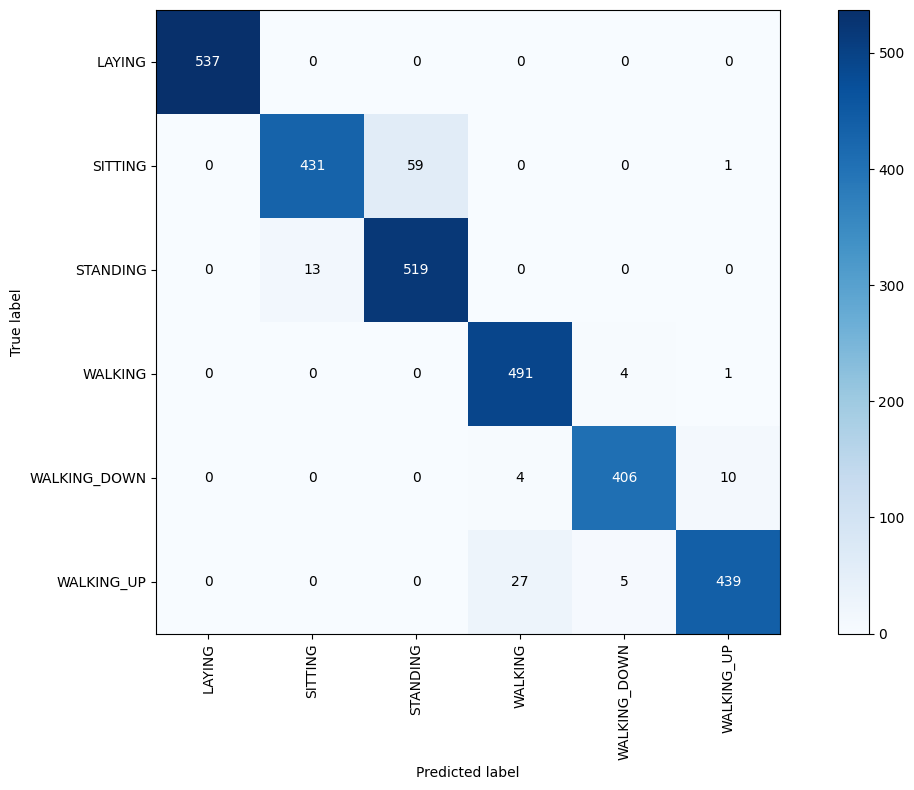

In [67]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

In [68]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [69]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=50)
Best set of parameters :  {'penalty': 'l2', 'C': 50}
Best score :  0.9333579359684052


In [57]:
# data = pd.concat([train_data, test_data])
# data = train_data.sample(frac=1)
# f_df = data.loc[:, data.columns.str.contains('^f|^s|^a|^A')]
# t_df = data.loc[:, data.columns.str.contains('^t|^s|^a|^A')]

In [56]:
# X = data.drop(['subject', 'activity_label'], axis=1)
# y = data['activity_label']

# X_f = f_df.drop(['subject', 'activity_label'], axis=1)
# y_f = f_df['activity_label']

# X_t = t_df.drop(['subject', 'activity_label'], axis=1)
# y_t = t_df['activity_label']

In [55]:
# pca = PCA(n_components=0.99)
# pca.fit(X)
# x_reduced = pca.transform(X)

# print('Frequency components number is {} Time components number is {}'.format(X_f.shape[1], X.shape[1] - X_f.shape[1]))
# print('Original number of features {} Reduced number of features {}'.format(X.shape[1], x_reduced.shape[1]))

# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
# x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduced, y, test_size=0.2, shuffle=True, random_state=42)
# x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, shuffle=True, random_state=42)
# x_train_t, x_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t, test_size=0.2, shuffle=True, random_state=42)

In [51]:
# kernel_evals = dict()
# def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
#     train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
#     test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
#     train_precision = metrics.precision_score(y_train, model.predict(X_train), average='micro')
#     test_precision = metrics.precision_score(y_test, model.predict(X_test), average='micro')
    
#     train_recall = metrics.recall_score(y_train, model.predict(X_train), average='micro')
#     test_recall = metrics.recall_score(y_test, model.predict(X_test), average='micro')
    
#     kernel_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
#     print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
#     print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
#     print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
#     actual = y_test
#     predicted = model.predict(X_test)
#     confusion_matrix = metrics.confusion_matrix(actual, predicted)
#     cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'DOWNSTAIRS',
#        'UPSTAIRS'])

#     fig, ax = plt.subplots(figsize=(10,10))
#     ax.grid(False)
#     cm_display.plot(ax=ax)

In [54]:
# lr = LogisticRegression().fit(x_train, y_train)
# evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)